In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 준비
# 상대경로로 CSV 읽어오기
file_path = '../../training_data.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 확인
print(df.head())

   Unnamed: 0  leverage_ratio  asset_liabilities    roe  asset_turnover  \
0           1          14.933           1.067048  0.107           0.081   
1           2          14.734           1.067941  0.117           0.085   
2           3          15.294           1.065449  0.137           0.085   
3           4          13.652           1.072060  0.167           0.097   
4           5          13.390           1.071841  0.151           0.106   

   debt_ratio  debt_ratio2    roa  capitalization_ratio  longtermdebt_invcap  \
0       0.937        0.043  0.018                 0.244                0.244   
1       0.936        0.041  0.020                 0.230                0.230   
2       0.939        0.049  0.021                 0.317                0.317   
3       0.932        0.070  0.025                 0.272                0.298   
4       0.930        0.071  0.023                 0.244                0.264   

   totaldebt_invcap  cash_debt  debt_ebitda  rect_turn  label  
0   

In [6]:
# 독립변수(X), 종속변수(y) 분리
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# 평가
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 score:", r2_score(y_test, y_pred))


Coefficients: [ 4.23430535e-07  7.18305650e-04  1.31770959e-01  1.29688984e-02
 -6.47973833e-01  2.14841245e-01  4.46224271e-02  5.17890700e-01
 -8.46156187e-02  2.68268610e-02 -1.93378434e-02 -8.27371705e-02
 -1.37853729e-04  1.34036195e-02]
Intercept: -0.26262156885253013
MSE: 0.017530233875659457
R2 score: 0.01744306206212709


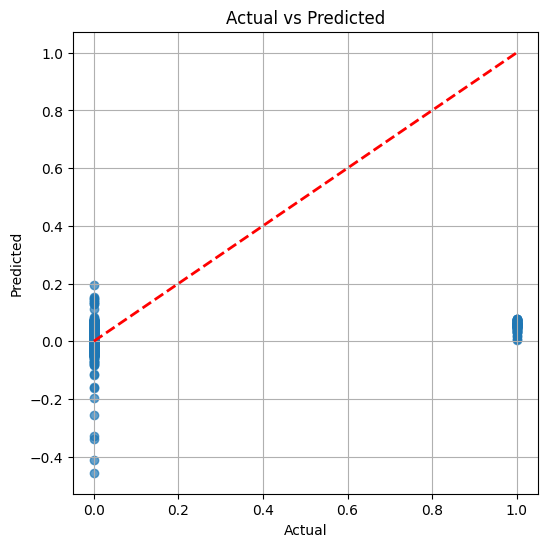

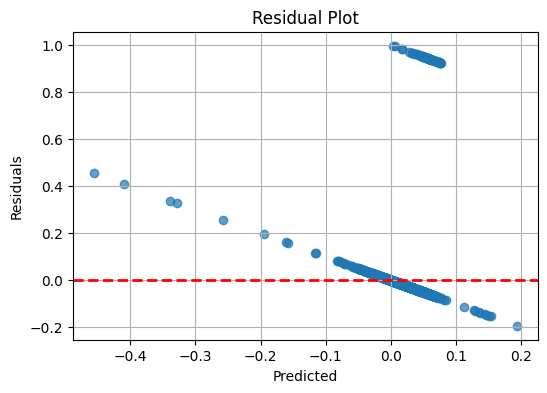

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 시각화 ① 실제 vs 예측
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid()
plt.show()

# 시각화 ② 잔차 plot
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid()
plt.show()
